In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/supermarket_sales -.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Month Name'] = df['Date'].dt.month_name()

In [7]:
df['Year'] = df['Date'].dt.year

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019


In [9]:
df['Month Year'] = df['Month Name'] + ", "+df['Year'].astype('str')

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year,Month Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019,"January, 2019"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019,"March, 2019"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019,"March, 2019"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019,"January, 2019"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019,"February, 2019"


In [11]:
df['Product line'].value_counts().head(2).index

df1 = df[df['Product line'].isin(list(df['Product line'].value_counts().head(2).index))][['Product line','Date','Total','gross income','Month Year']]
df1 = df[['Date','Product line','Total','gross income','Month Year']]

In [12]:
df1.reset_index(inplace=True)

In [13]:
df1

,index,Date,Product line,Total,gross income,Month Year
0,0,2019-01-05,Health and beauty,548.9715,26.1415,"January, 2019"
1,1,2019-03-08,Electronic accessories,80.2200,3.8200,"March, 2019"
2,2,2019-03-03,Home and lifestyle,340.5255,16.2155,"March, 2019"
3,3,2019-01-27,Health and beauty,489.0480,23.2880,"January, 2019"
4,4,2019-02-08,Sports and travel,634.3785,30.2085,"February, 2019"
...,...,...,...,...,...,...
995,995,2019-01-29,Health and beauty,42.3675,2.0175,"January, 2019"
996,996,2019-03-02,Home and lifestyle,1022.4900,48.6900,"March, 2019"
997,997,2019-02-09,Food and beverages,33.4320,1.5920,"February, 2019"
998,998,2019-02-22,Home and lifestyle,69.1110,3.2910,"February, 2019"


In [14]:

df1 = df1.groupby(['Month Year','Product line'])[['Total','gross income']].sum().reset_index()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month Year    18 non-null     object 
 1   Product line  18 non-null     object 
 2   Total         18 non-null     float64
 3   gross income  18 non-null     float64
dtypes: float64(2), object(2)
memory usage: 708.0+ bytes


In [16]:
df1['Month Year'] = pd.to_datetime(df1['Month Year'],format = '%B, %Y')

In [17]:
df1.sort_values('Month Year',inplace=True)
df1['Month Year'] = df1['Month Year'].dt.strftime('%B, %Y')
df1.head()

,Month Year,Product line,Total,gross income
8,"January, 2019",Food and beverages,19570.530,931.930
11,"January, 2019",Sports and travel,21667.023,1031.763
10,"January, 2019",Home and lifestyle,20494.740,975.940
9,"January, 2019",Health and beauty,16383.171,780.151
7,"January, 2019",Fashion accessories,19345.116,921.196


        Month Year            Product line       Total  gross income
6    January, 2019  Electronic accessories  18831.2880      896.7280
0   February, 2019  Electronic accessories  17362.9050      826.8050
12     March, 2019  Electronic accessories  18143.3385      863.9685
        Month Year         Product line       Total  gross income
7    January, 2019  Fashion accessories  19345.1160      921.1960
1   February, 2019  Fashion accessories  19009.8615      905.2315
13     March, 2019  Fashion accessories  15950.9175      759.5675


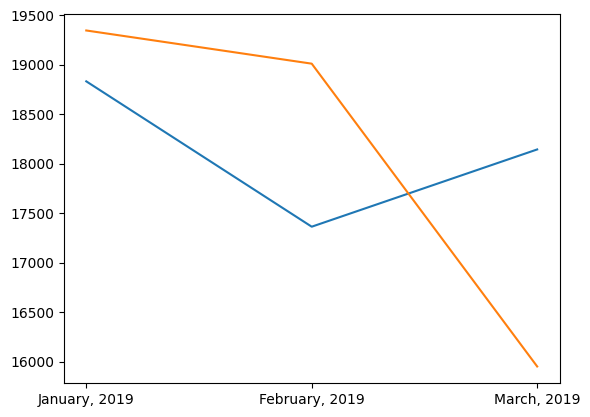

In [18]:
df2 = df1[df1['Product line']=='Electronic accessories']
print(df2)
df3 = df1[df1['Product line']=='Fashion accessories']
print(df3)
plt.plot(df2['Month Year'],df2['Total'])

plt.plot(df3['Month Year'],df3['Total'])


Text(0, 0.5, 'Total of Sales')

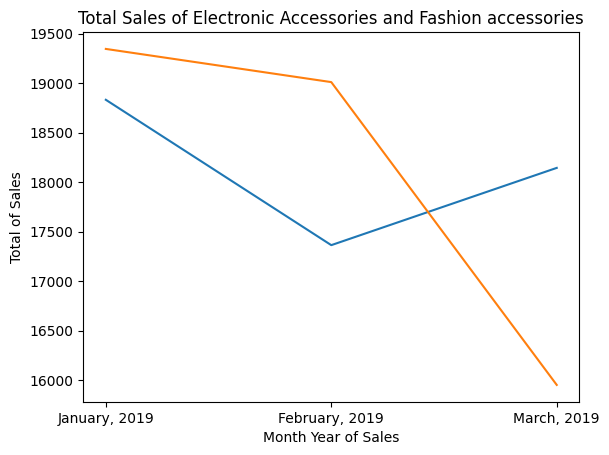

In [19]:
plt.plot(df2['Month Year'],df2['Total'])
plt.plot(df3['Month Year'],df3['Total'])
plt.title('Total Sales of Electronic Accessories and Fashion accessories')
plt.xlabel('Month Year of Sales')
plt.ylabel('Total of Sales')


Text(0, 0.5, 'Total of Sales')

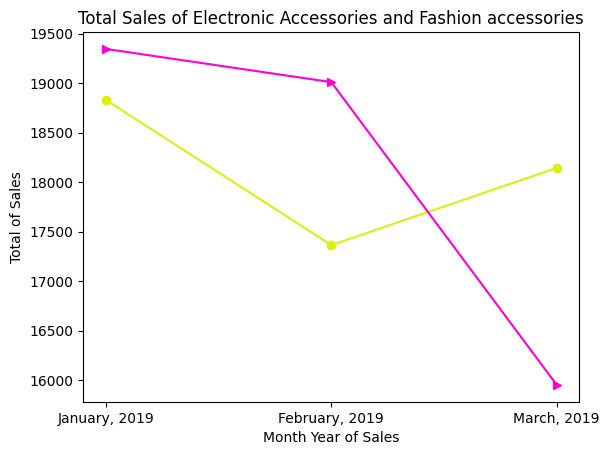

In [20]:
#changing the default colors of the lines, markers, line styles
plt.plot(df2['Month Year'],df2['Total'],color = '#D9F10F',marker='o')
plt.plot(df3['Month Year'],df3['Total'],color = '#FC00D6',marker='>')
plt.title('Total Sales of Electronic Accessories and Fashion accessories')
plt.xlabel('Month Year of Sales')
plt.ylabel('Total of Sales')


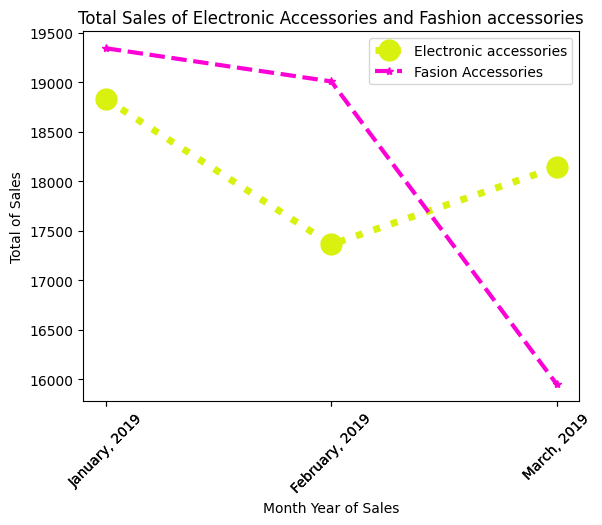

In [21]:
#changing the line width, marker sizes, line width, labels

plt.plot(df2['Month Year'],df2['Total'],color = '#D9F10F',marker='o',markersize=15,
         linestyle='dotted',linewidth = 5,label='Electronic accessories')
plt.plot(df3['Month Year'],df3['Total'],color = '#FC00D6',marker='*',
         linestyle='dashed',linewidth = 3,label='Fasion Accessories')
plt.title('Total Sales of Electronic Accessories and Fashion accessories')
plt.xlabel('Month Year of Sales')
plt.ylabel('Total of Sales')
plt.xticks(pd.concat([df2['Month Year'],df3['Month Year']]),rotation = 45)
plt.legend(loc='best')

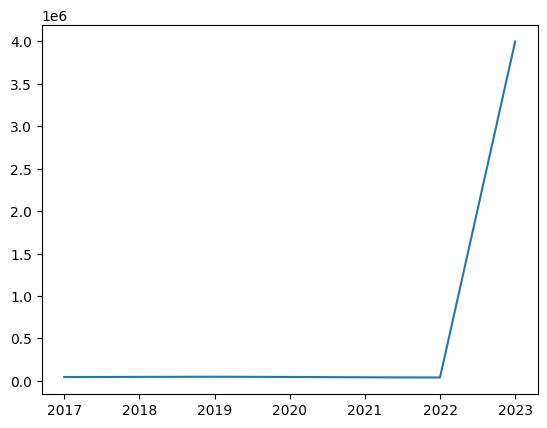

In [22]:
price = [45000,47000,49000,46000,42000,40000,4000000]
year = [2017,2018,2019,2020,2021,2022,2023]

plt.plot(year,price)

(40000.0, 60000.0)

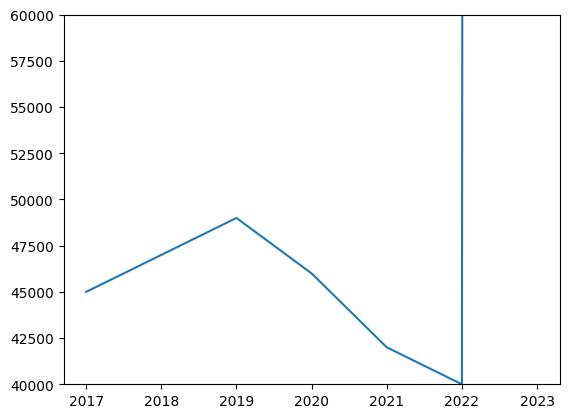

In [23]:
price = [45000,47000,49000,46000,42000,40000,4000000]
year = [2017,2018,2019,2020,2021,2022,2023]

plt.plot(year,price)
plt.ylim(40000,60000)

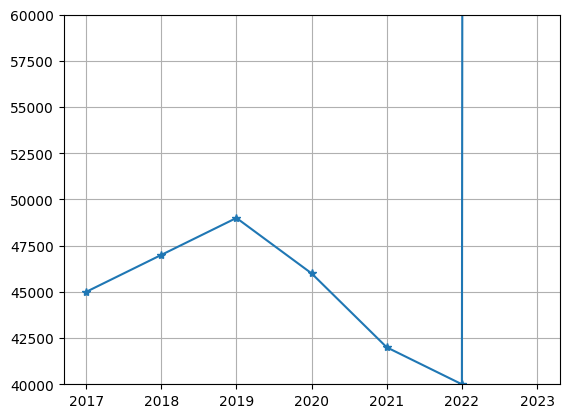

In [24]:
plt.plot(year,price,marker='*')
plt.ylim(40000,60000)
plt.grid()
plt.show()

In [25]:
#Scatter plot :
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year,Month Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019,"January, 2019"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019,"March, 2019"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019,"March, 2019"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019,"January, 2019"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019,"February, 2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,January,2019,"January, 2019"
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,March,2019,"March, 2019"
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,February,2019,"February, 2019"
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,February,2019,"February, 2019"


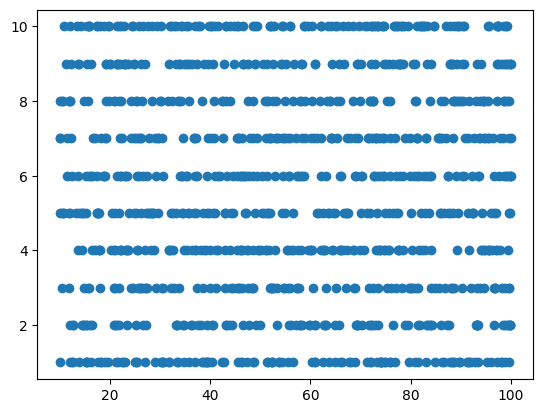

In [26]:
plt.scatter(df['Unit price'],df['Quantity'])

In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year,Month Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019,"January, 2019"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019,"March, 2019"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019,"March, 2019"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019,"January, 2019"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019,"February, 2019"


In [28]:
tips = sns.load_dataset('tips')

In [29]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Total bill Vs Tips')

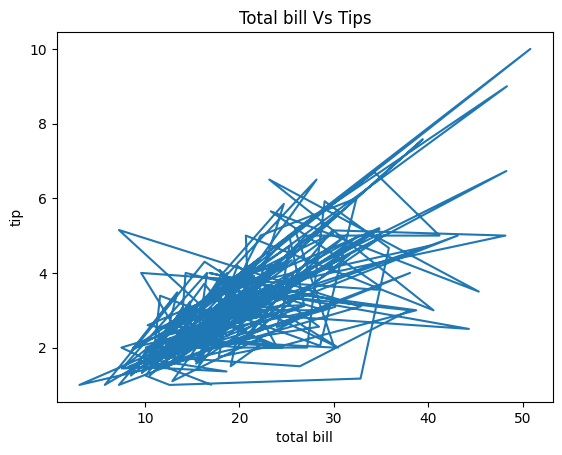

In [30]:
tips = sns.load_dataset('tips')
tips.head()
plt.plot(tips['total_bill'],tips['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Total bill Vs Tips')

Text(0.5, 1.0, 'Total bill Vs Tips')

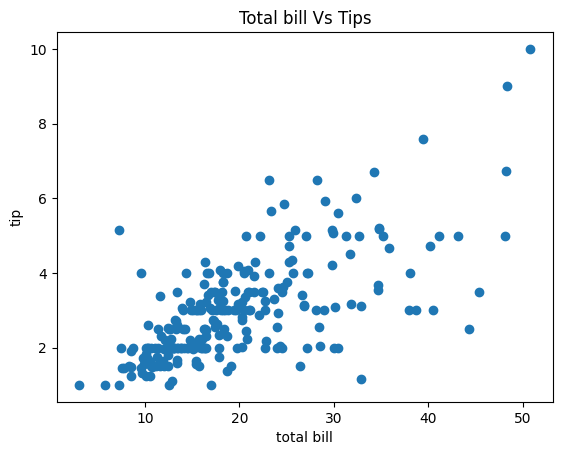

In [31]:
plt.scatter(tips['total_bill'],tips['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Total bill Vs Tips')

Text(0.5, 1.0, 'Total bill Vs Tips')

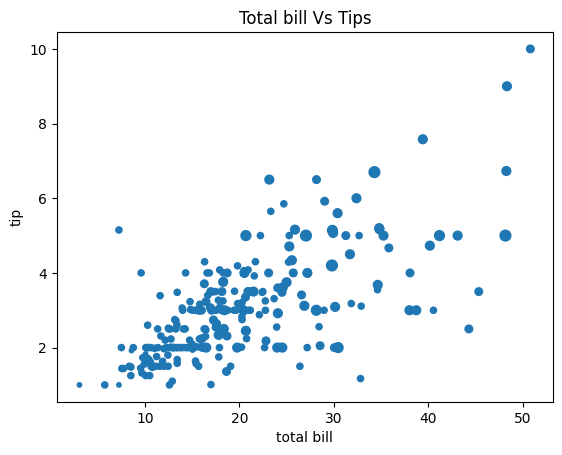

In [32]:
plt.scatter(tips['total_bill'],tips['tip'],s=tips['size']*10)
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Total bill Vs Tips')

Text(0.5, 1.0, 'Total bill Vs Tips')

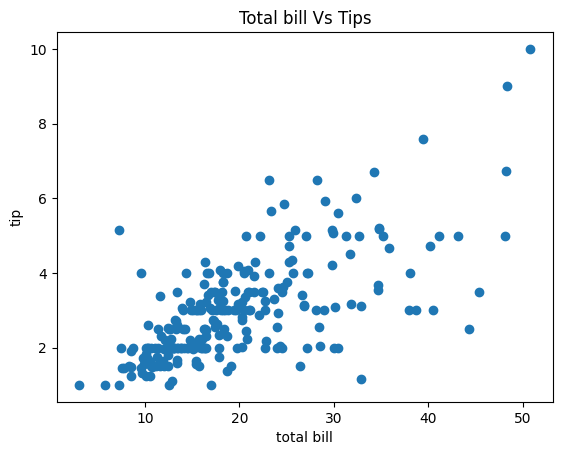

In [33]:
plt.plot(tips['total_bill'],tips['tip'],'o')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Total bill Vs Tips')

In [34]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year,Month Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019,"January, 2019"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019,"March, 2019"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019,"March, 2019"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019,"January, 2019"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019,"February, 2019"


In [35]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [36]:
df1 = df.groupby('Product line')['Quantity'].sum().reset_index()

In [37]:
df1.head()

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911


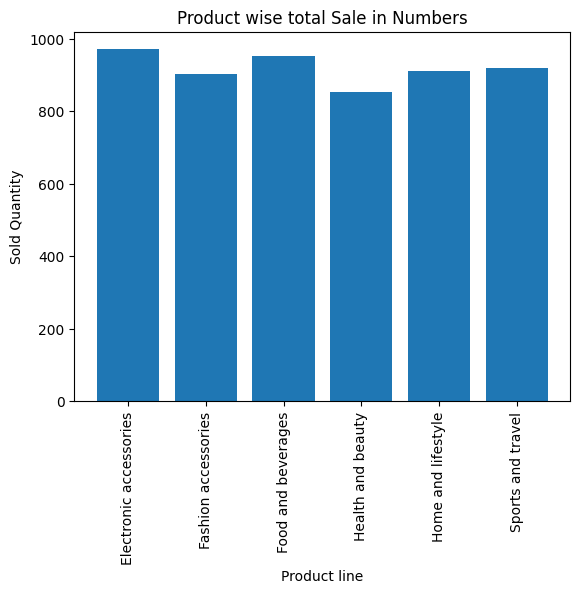

In [38]:
plt.bar(df1['Product line'],df1['Quantity'])
plt.xlabel('Product line')
plt.ylabel('Sold Quantity')
plt.title('Product wise total Sale in Numbers')
plt.xticks(rotation=90)
plt.show()

In [39]:
df_gender_spent = df.groupby('Gender')['Total'].sum().reset_index()

In [40]:
df_gender_spent

,Gender,Total
0,Female,167882.925
1,Male,155083.824


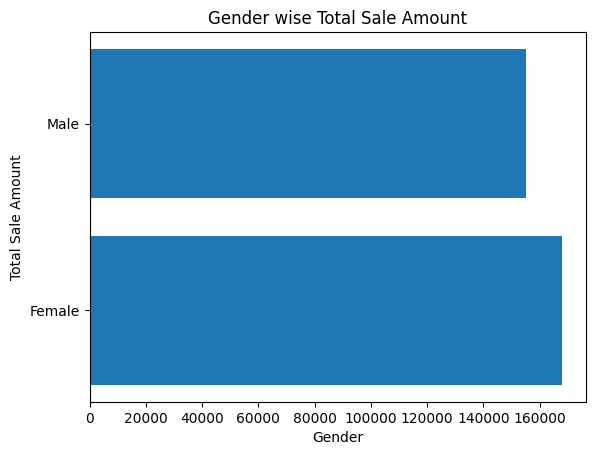

In [41]:
plt.barh(df_gender_spent['Gender'],df_gender_spent['Total'])
plt.xlabel('Gender')
plt.ylabel('Total Sale Amount')
plt.title('Gender wise Total Sale Amount')
plt.show()

In [42]:
#product wise month on month sale
df_mom_sale = df.groupby(['Month Year','Product line'])[['Total']].sum().reset_index()


In [43]:
df_mom_sale['Month Year'] = pd.to_datetime(df_mom_sale['Month Year'],format = '%B, %Y')

In [44]:
df_mom_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month Year    18 non-null     datetime64[ns]
 1   Product line  18 non-null     object        
 2   Total         18 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 564.0+ bytes


In [45]:
df_mom_sale.sort_values( ['Product line','Month Year'],inplace=True)

In [46]:
df_mom_sale['Month Year'] = df_mom_sale['Month Year'].dt.strftime('%B, %Y')

In [47]:
df_mom_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 6 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month Year    18 non-null     object 
 1   Product line  18 non-null     object 
 2   Total         18 non-null     float64
dtypes: float64(1), object(2)
memory usage: 576.0+ bytes


In [48]:
df_mom_sale

,Month Year,Product line,Total
6,"January, 2019",Electronic accessories,18831.2880
0,"February, 2019",Electronic accessories,17362.9050
12,"March, 2019",Electronic accessories,18143.3385
7,"January, 2019",Fashion accessories,19345.1160
1,"February, 2019",Fashion accessories,19009.8615
13,"March, 2019",Fashion accessories,15950.9175
8,"January, 2019",Food and beverages,19570.5300
2,"February, 2019",Food and beverages,20000.3580
14,"March, 2019",Food and beverages,16573.9560
9,"January, 2019",Health and beauty,16383.1710


In [49]:
df_mom_sale_stack = df_mom_sale.set_index(['Product line','Month Year']).unstack().reset_index()

In [50]:
df_mom_sale_stack

Product line          Total                          
Month Year                         February, 2019 January, 2019 March, 2019
0           Electronic accessories     17362.9050     18831.288  18143.3385
1              Fashion accessories     19009.8615     19345.116  15950.9175
2               Food and beverages     20000.3580     19570.530  16573.9560
3                Health and beauty     14602.2555     16383.171  18208.3125
4               Home and lifestyle     12434.3835     20494.740  20932.7895
5                Sports and travel     13809.6105     21667.023  19646.1930

In [51]:
df_mom_sale_stack.loc[0,'Total']['February, 2019']

17362.905

Text(0.5, 1.0, 'Product line wise total Sales')

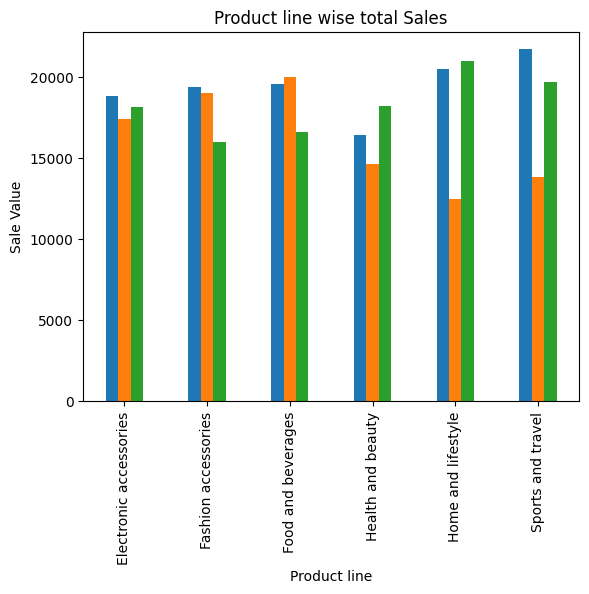

In [52]:
x = 0.15
plt.bar(np.arange(0,6)-x,df_mom_sale_stack['Total']['January, 2019'],width=x,label ='Jan 2019')
plt.bar(np.arange(0,6),df_mom_sale_stack['Total']['February, 2019'],width=x,label = 'Feb 2019')
plt.bar(np.arange(0,6)+x,df_mom_sale_stack['Total']['March, 2019'],width=x,label = 'Mar 2019')
plt.xticks(np.arange(0,6),df_mom_sale_stack['Product line'],rotation = 90)
plt.xlabel('Product line')
plt.ylabel('Sale Value')
plt.title('Product line wise total Sales')

Text(0.5, 1.0, 'Product line wise total Sales')

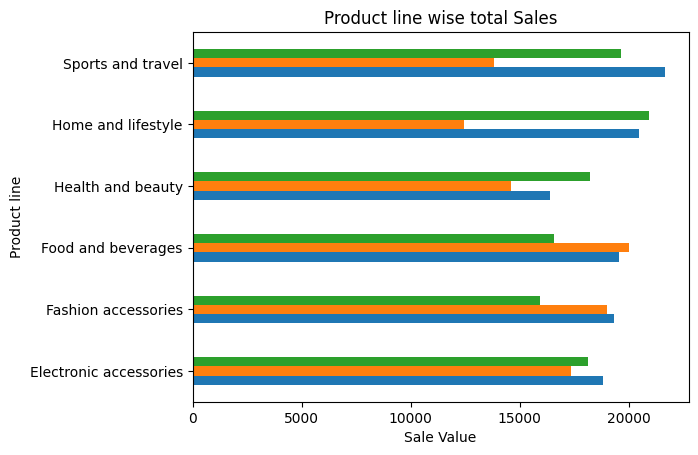

In [53]:
x = 0.15
plt.barh(np.arange(0,6)-x,df_mom_sale_stack['Total']['January, 2019'],height=x,label ='Jan 2019')
plt.barh(np.arange(0,6),df_mom_sale_stack['Total']['February, 2019'],height=x,label = 'Feb 2019')
plt.barh(np.arange(0,6)+x,df_mom_sale_stack['Total']['March, 2019'],height=x,label = 'Mar 2019')
plt.yticks(np.arange(0,6),df_mom_sale_stack['Product line'])
plt.ylabel('Product line')
plt.xlabel('Sale Value')
plt.title('Product line wise total Sales')

In [54]:
df_mom_sale

,Month Year,Product line,Total
6,"January, 2019",Electronic accessories,18831.2880
0,"February, 2019",Electronic accessories,17362.9050
12,"March, 2019",Electronic accessories,18143.3385
7,"January, 2019",Fashion accessories,19345.1160
1,"February, 2019",Fashion accessories,19009.8615
13,"March, 2019",Fashion accessories,15950.9175
8,"January, 2019",Food and beverages,19570.5300
2,"February, 2019",Food and beverages,20000.3580
14,"March, 2019",Food and beverages,16573.9560
9,"January, 2019",Health and beauty,16383.1710


In [55]:
df_mom_sale_stack

Product line          Total                          
Month Year                         February, 2019 January, 2019 March, 2019
0           Electronic accessories     17362.9050     18831.288  18143.3385
1              Fashion accessories     19009.8615     19345.116  15950.9175
2               Food and beverages     20000.3580     19570.530  16573.9560
3                Health and beauty     14602.2555     16383.171  18208.3125
4               Home and lifestyle     12434.3835     20494.740  20932.7895
5                Sports and travel     13809.6105     21667.023  19646.1930

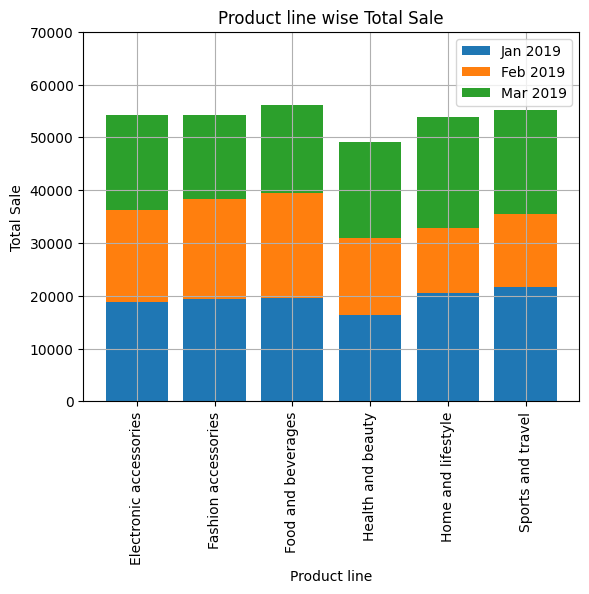

In [56]:
plt.bar(df_mom_sale_stack['Product line'],df_mom_sale_stack['Total']['January, 2019'],label='Jan 2019')
plt.bar(df_mom_sale_stack['Product line'],df_mom_sale_stack['Total']['February, 2019'],bottom=df_mom_sale_stack['Total']['January, 2019'],label='Feb 2019')
plt.bar(df_mom_sale_stack['Product line'],df_mom_sale_stack['Total']['March, 2019'],bottom=df_mom_sale_stack['Total']['January, 2019']+df_mom_sale_stack['Total']['February, 2019'],label='Mar 2019')
plt.xlabel('Product line')
plt.ylabel('Total Sale')
plt.title('Product line wise Total Sale')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.ylim(0,70000)
plt.show()


In [57]:
#histogram :
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year,Month Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019,"January, 2019"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019,"March, 2019"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019,"March, 2019"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019,"January, 2019"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019,"February, 2019"


(array([233., 215., 146., 110.,  91.,  68.,  45.,  51.,  25.,  16.]),
 array([  10.6785 ,  113.87565,  217.0728 ,  320.26995,  423.4671 ,
         526.66425,  629.8614 ,  733.05855,  836.2557 ,  939.45285,
        1042.65   ]),
 <BarContainer object of 10 artists>)

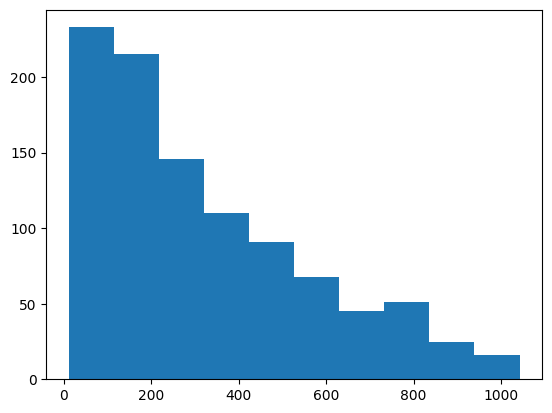

In [58]:
plt.hist(df['Total'])

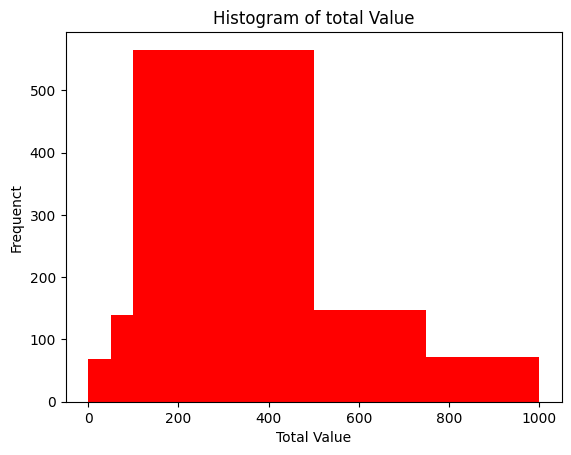

In [59]:
colors = ['red']
plt.hist(df['Total'],bins=[0,50,100,500,750,1000],color = colors)
plt.xlabel('Total Value')
plt.ylabel('Frequenct')
plt.title('Histogram of total Value')
plt.show()


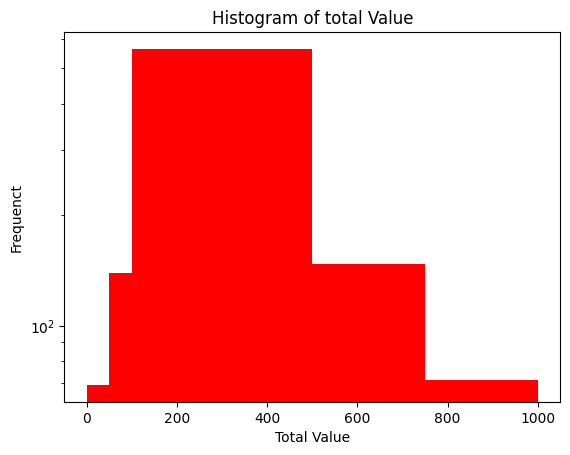

In [60]:
colors = ['red']
plt.hist(df['Total'],bins=[0,50,100,500,750,1000],color = colors,log=True)
plt.xlabel('Total Value')
plt.ylabel('Frequenct')
plt.title('Histogram of total Value')
plt.show()


In [62]:
#Pie chart
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name,Year,Month Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,2019,"January, 2019"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,2019,"March, 2019"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,2019,"March, 2019"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,2019,"January, 2019"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,2019,"February, 2019"


In [79]:
df_pl_gross_income = df.groupby('Product line')['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False)

In [80]:
df_pl_gross_income

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


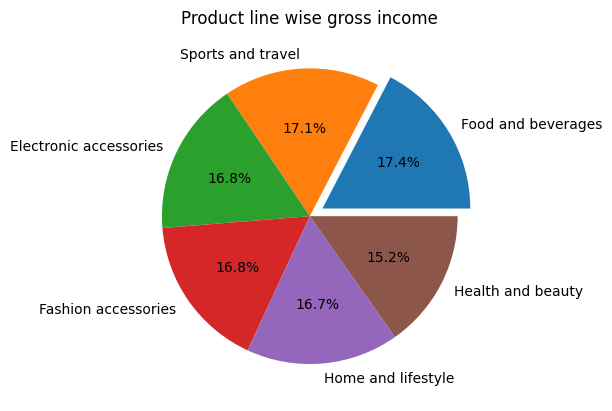

In [85]:
plt.pie(df_pl_gross_income['gross income'],labels=df_pl_gross_income['Product line'],autopct='%0.1f%%',explode = [0.1,0,0,0,0,0])
plt.title('Product line wise gross income')
plt.show()

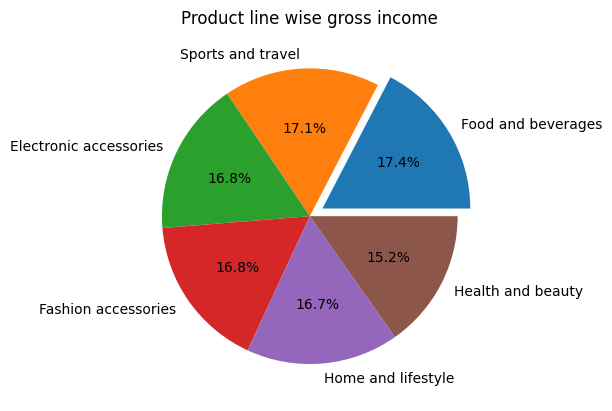

In [86]:
plt.pie(df_pl_gross_income['gross income'],labels=df_pl_gross_income['Product line'],autopct='%0.1f%%',explode = [0.1,0,0,0,0,0])
plt.title('Product line wise gross income')
plt.savefig('sample.jpg')